<a href="https://colab.research.google.com/github/VaibhavShintre/Introduction-to-Data-Science/blob/main/Amrish_Copy_individual_work_CSC_442_Project_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Names: Lavan Aditya, Amrish Naranappa, Vaibhav Shintre, Austin Bressler

In [12]:
# install the neccesary libraries
from google.colab import files
import io
import pandas as pd
import numpy as np

# upload the data file
uploaded = files.upload()

Saving student-mat.csv to student-mat (1).csv
Saving student-por.csv to student-por (1).csv


In [14]:
# read in the database
StudentMath = pd.read_csv('student-mat.csv', delimiter=';')
StudentPort = pd.read_csv('student-por.csv', delimiter=';')

# checking if the files were read correctly
print(StudentMath)
print(StudentPort)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [15]:
# Dropping the 'G1' and 'G2' columns from the StudentMath DataFrame to keep only 'G3' and other relevant columns
mathG3Only = StudentMath.drop(['G1', 'G2'], axis=1)

# Dropping the 'G1' and 'G2' columns from the StudentPort DataFrame to keep only 'G3' and other relevant columns
portG3Only = StudentPort.drop(['G1', 'G2'], axis=1)

# Rename columns in the math dataset to clearly indicate these values come from the math file.
Sm_temp = mathG3Only.rename(columns={'G3': 'MG3', "paid": "paidM", "failures": "failuresM", "absences": "absencesM"}, inplace=False)
print(Sm_temp)
# Rename columns in the Portuguese dataset to indicate they belong to the Portugal file.
sp_temp = portG3Only.rename(columns={'G3': 'PG3', "paid": "paidP", "failures": "failuresP", "absences": "absencesP"}, inplace=False)
print(sp_temp)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime  goout

In [ ]:
# performing an inner join between Sm_temp and sp_temp on their common columns
sm_inter = pd.merge(Sm_temp, sp_temp, 'inner')
print ("Merged dataframe info :")

# printing the result to verify that there is a correct amount of matching files.
print(sm_inter.info())

Merged dataframe info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      370 non-null    object
 1   sex         370 non-null    object
 2   age         370 non-null    int64 
 3   address     370 non-null    object
 4   famsize     370 non-null    object
 5   Pstatus     370 non-null    object
 6   Medu        370 non-null    int64 
 7   Fedu        370 non-null    int64 
 8   Mjob        370 non-null    object
 9   Fjob        370 non-null    object
 10  reason      370 non-null    object
 11  guardian    370 non-null    object
 12  traveltime  370 non-null    int64 
 13  studytime   370 non-null    int64 
 14  failuresM   370 non-null    int64 
 15  schoolsup   370 non-null    object
 16  famsup      370 non-null    object
 17  paidM       370 non-null    object
 18  activities  370 non-null    object
 19  nursery     370 non-null  

Mean Squared Error on Test Set: 14.25

Truncated Decision Tree Rules (max_depth=3):
|--- absencesM <= 1.00
|   |--- absencesP <= 7.50
|   |   |--- health <= 3.50
|   |   |   |--- health <= 1.50
|   |   |   |   |--- value: [-15.00]
|   |   |   |--- health >  1.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- health >  3.50
|   |   |   |--- absencesP <= 5.00
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- absencesP >  5.00
|   |   |   |   |--- truncated branch of depth 2
|   |--- absencesP >  7.50
|   |   |--- health <= 4.50
|   |   |   |--- health <= 3.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- health >  3.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- health >  4.50
|   |   |   |--- absencesP <= 19.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- absencesP >  19.00
|   |   |   |   |--- value: [-6.00]
|--- absencesM >  1.00
|   |--- absencesP <= 1.00
|   |   |--- health <= 2.50
|   |   |   

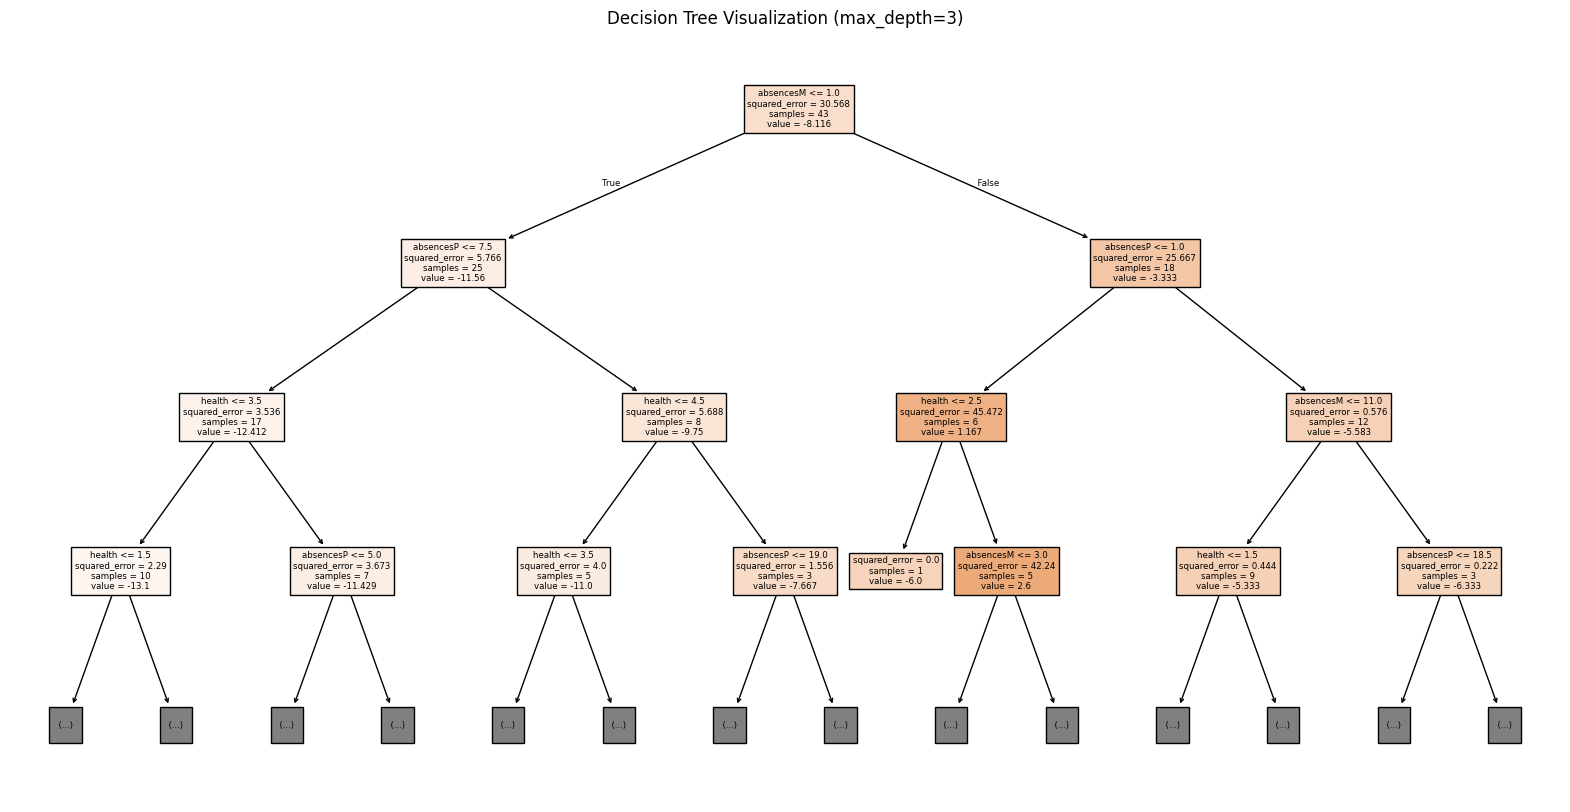

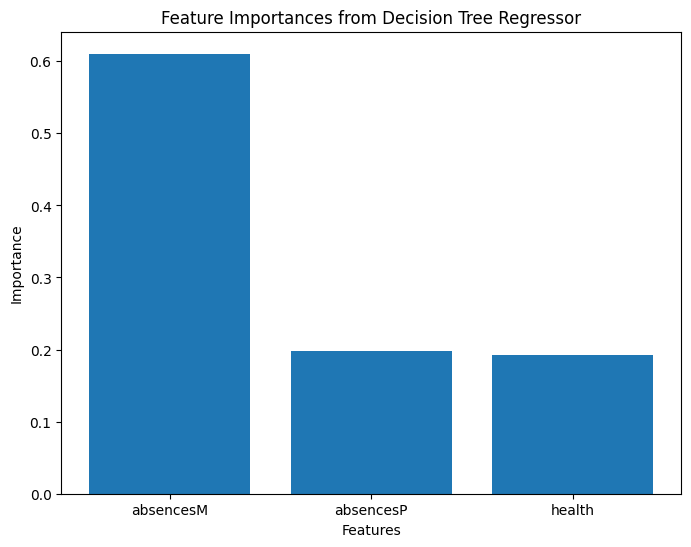

In [26]:
#feature engineering
# Create a new target variable: the difference in final grades (math vs. Portuguese).

sm_inter['DeltaG3'] = sm_inter['MG3'] - sm_inter['PG3']
# Select a subset of socioeconomic and academic features.
features = ['absencesM', 'absencesP', 'health']

X = extreme_gap[features]
y = extreme_gap['DeltaG3']

# --- One-Hot Encoding for Categorical Features ---
categorical_features = ['schoolsup', 'famsup', 'paidM', 'paidP', 'activities'] # Add 'activities' here
#X = pd.get_dummies(X, columns=categorical_features, drop_first=True) # Use drop_first=True to avoid multicollinearity

# --- Splitting Data ---
from sklearn.model_selection import train_test_split

# Split the data: 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Decision Tree Regression Model ---
# ... (rest of your code remains the same)

# --- Decision Tree Regression Model ---
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the decision tree regressor.
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predict on the test set.
y_pred = dt_reg.predict(X_test)

# Evaluate the model using Mean Squared Error.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# --- Decision Tree Rules Output ---
# Print the full tree rules (this may be very long).
#tree_rules_full = export_text(dt_reg, feature_names=features)
#print("\nFull Decision Tree Rules:")
#print(tree_rules_full)

# Print a truncated version of the tree rules (limited to depth 3) for easier interpretation.
tree_rules_limited = export_text(dt_reg, feature_names=features, max_depth=3)
print("\nTruncated Decision Tree Rules (max_depth=3):")
print(tree_rules_limited)

# --- Visualization ---
# Visualize the decision tree (limiting depth to 3 for clarity).
plt.figure(figsize=(20,10))
plot_tree(dt_reg, feature_names=features, filled=True, max_depth=3)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

# Plot feature importances.
importances = dt_reg.feature_importances_
plt.figure(figsize=(8,6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree Regressor')
plt.show()

In [22]:
# 1. Calculate the difference in absences (Math - Portuguese)
sm_inter['overall_performance'] = (sm_inter['MG3'] + sm_inter['PG3']) / 2
sm_inter['DeltaAbsences'] = sm_inter['absencesM'] - sm_inter['absencesP']

# 2. Filter for students with significant grade differences (|ΔG3| > 4)
extreme_gap = sm_inter[(np.abs(sm_inter['DeltaG3']) > 4) & (sm_inter['overall_performance'] < 10)]

# 3. Display how many rows were returned
num_rows = extreme_gap.shape[0]
print(f"Number of rows returned: {num_rows}")

# 4. Display a sample of 10 rows from the filtered data
sample_extreme = extreme_gap[['absencesM', 'absencesP', 'DeltaAbsences', 'health', 'MG3', 'PG3', 'DeltaG3']].head(10)
print(sample_extreme)


Number of rows returned: 54
    absencesM  absencesP  DeltaAbsences  health  MG3  PG3  DeltaG3
0           6          4              2       3    6   11       -5
1           4          2              2       3    6   11       -5
7           6          2              4       1    6   13       -7
35          0          4             -4       5    6   11       -5
45          8          4              4       5    6   11       -5
49          2          2              0       3    7   12       -5
72          2          2              0       5    5   11       -6
79         12         14             -2       3    5   11       -6
82         10          4              6       5    6   11       -5
86          4          6             -2       2    6   11       -5


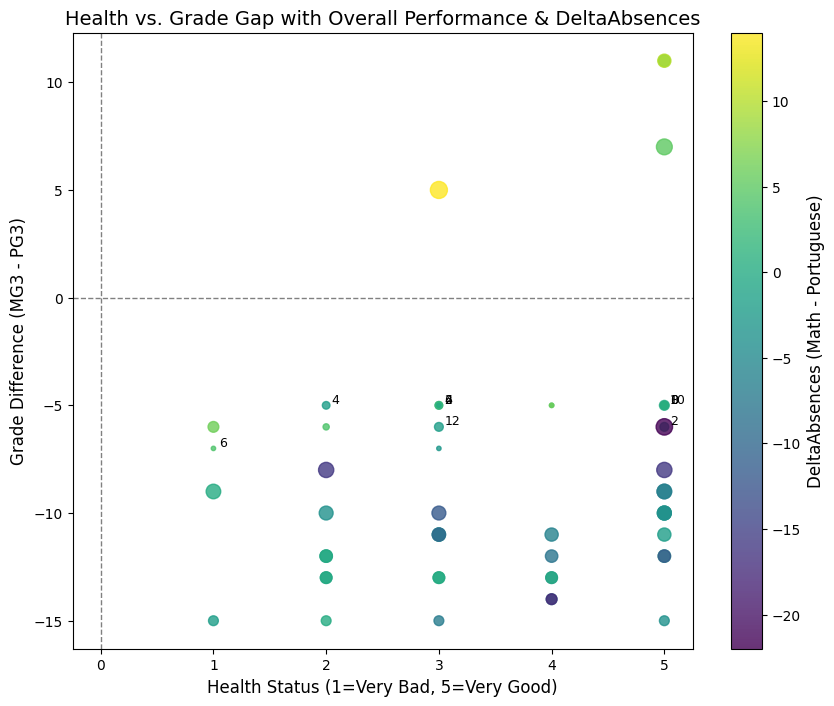

In [23]:
bubble_size = (10 - extreme_gap['overall_performance']) * 20

# Create the bubble chart
plt.figure(figsize=(10,8))
scatter = plt.scatter(extreme_gap['health'], extreme_gap['DeltaG3'],
                      s=bubble_size,
                      c=extreme_gap['DeltaAbsences'],
                      cmap='viridis',
                      alpha=0.8)

# Add a color bar for DeltaAbsences
cbar = plt.colorbar(scatter)
cbar.set_label('DeltaAbsences (Math - Portuguese)', fontsize=12)

plt.xlabel('Health Status (1=Very Bad, 5=Very Good)', fontsize=12)
plt.ylabel('Grade Difference (MG3 - PG3)', fontsize=12)
plt.title('Health vs. Grade Gap with Overall Performance & DeltaAbsences', fontsize=14)

# Draw reference lines at zero for clarity
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)

# Annotate the first 10 points with their Math absence values
for idx, row in extreme_gap.head(10).iterrows():
    plt.text(row['health'] + 0.05, row['DeltaG3'] + 0.1, f"{int(row['absencesM'])}", fontsize=9)

plt.show()

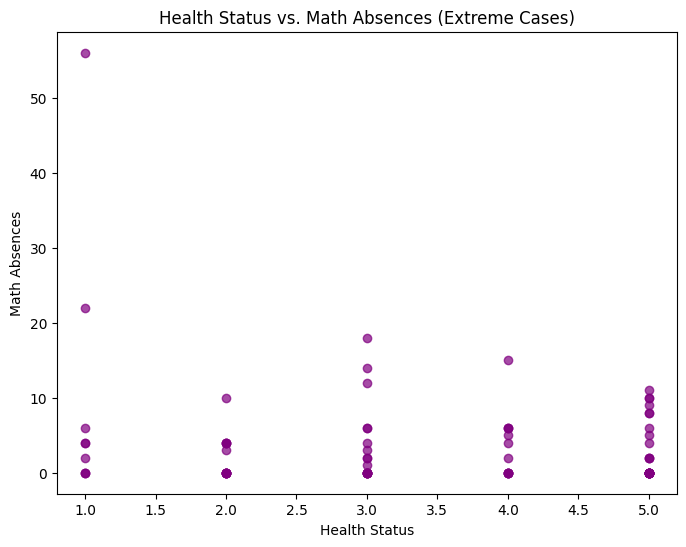

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(extreme_gap['health'], extreme_gap['absencesM'], color='purple', alpha=0.7)
plt.xlabel('Health Status')
plt.ylabel('Math Absences')
plt.title('Health Status vs. Math Absences (Extreme Cases)')
plt.show()

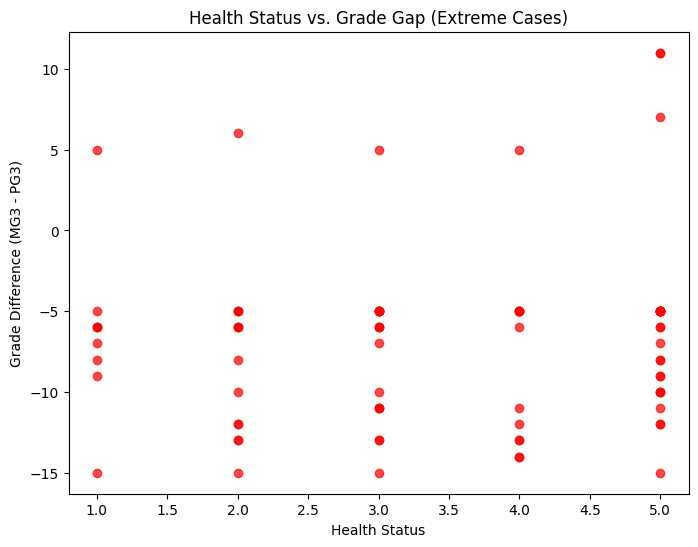

In [ ]:
import matplotlib.pyplot as plt

#scatter plot to examine how health status correlates with the grade gap (MG3 - PG3).
plt.figure(figsize=(8,6))
plt.scatter(extreme_gap['health'], extreme_gap['DeltaG3'], color='red', alpha=0.7)
plt.xlabel('Health Status')
plt.ylabel('Grade Difference (MG3 - PG3)')
plt.title('Health Status vs. Grade Gap (Extreme Cases)')
plt.show()


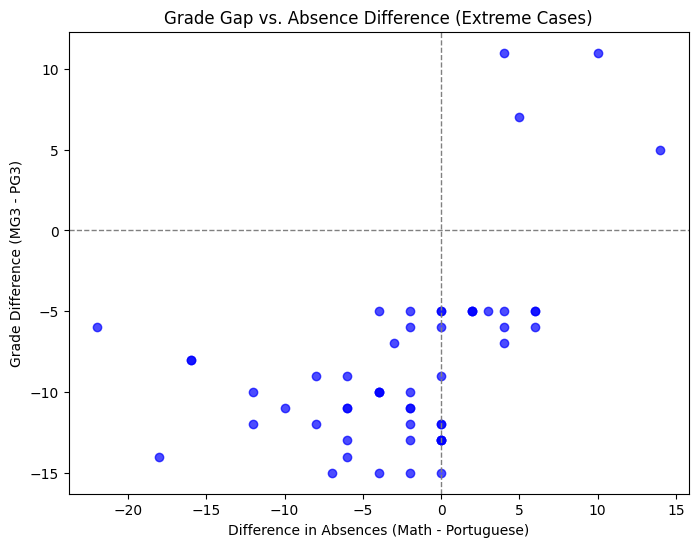

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot to examine how the difference in absences (DeltaAbsences)
# relates to the grade gap (DeltaG3) for students with extreme grade differences.
plt.figure(figsize=(8,6))
plt.scatter(extreme_gap['DeltaAbsences'], extreme_gap['DeltaG3'], color='blue', alpha=0.7)

# Draw reference lines at zero for both axes.
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)

# Add labels and title to the plot.
plt.xlabel('Difference in Absences (Math - Portuguese)')
plt.ylabel('Grade Difference (MG3 - PG3)')
plt.title('Grade Gap vs. Absence Difference (Extreme Cases)')
plt.show()

Descriptive statistics for DeltaG3:
count    54.000000
mean     -8.129630
std       5.831102
min     -15.000000
25%     -12.000000
50%      -9.500000
75%      -5.000000
max      11.000000
Name: DeltaG3, dtype: float64


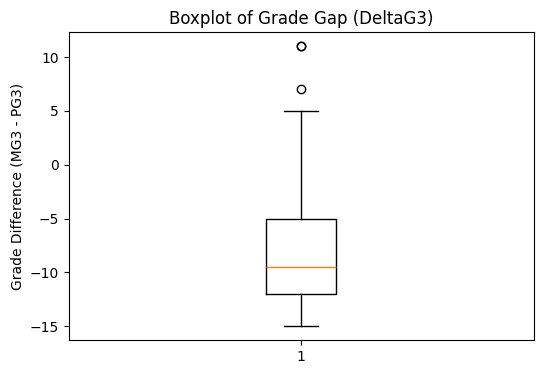

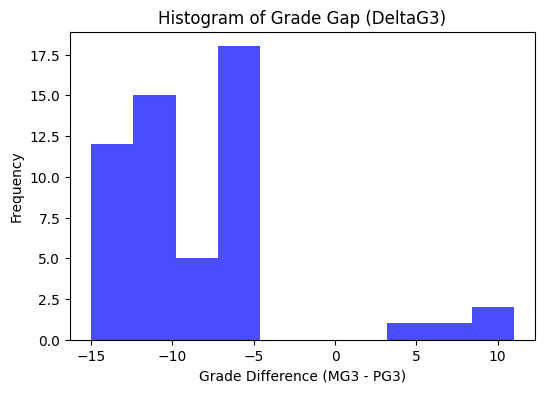

In [ ]:
import matplotlib.pyplot as plt

# 1. Print basic descriptive statistics for the grade gap
print("Descriptive statistics for DeltaG3:")
print(extreme_gap['DeltaG3'].describe())

# 2. Plot a boxplot to quickly see outliers, quartiles, and the median
plt.figure(figsize=(6,4))
plt.boxplot(extreme_gap['DeltaG3'], vert=True)
plt.title('Boxplot of Grade Gap (DeltaG3)')
plt.ylabel('Grade Difference (MG3 - PG3)')
plt.show()

# 3. Plot a histogram to visualize the distribution of the grade gap
plt.figure(figsize=(6,4))
plt.hist(extreme_gap['DeltaG3'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Grade Difference (MG3 - PG3)')
plt.ylabel('Frequency')
plt.title('Histogram of Grade Gap (DeltaG3)')
plt.show()


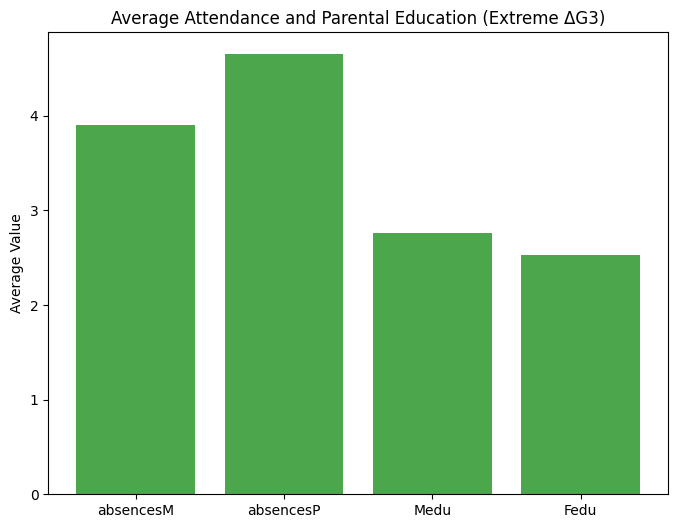

In [ ]:
# Compute average values for selected features in the extreme subset
avg_stats = extreme_gap[['absencesM', 'absencesP', 'Medu', 'Fedu']].mean()

plt.figure(figsize=(8,6))
plt.bar(avg_stats.index, avg_stats.values, color='green', alpha=0.7)
plt.ylabel('Average Value')
plt.title('Average Attendance and Parental Education (Extreme ΔG3)')
plt.show()


Baseline Decision Tree MSE: 14.25
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimized Decision Tree MSE: 16.18
Random Forest Mean Squared Error: 2.54
absencesM: 0.660
absencesP: 0.222
health: 0.118


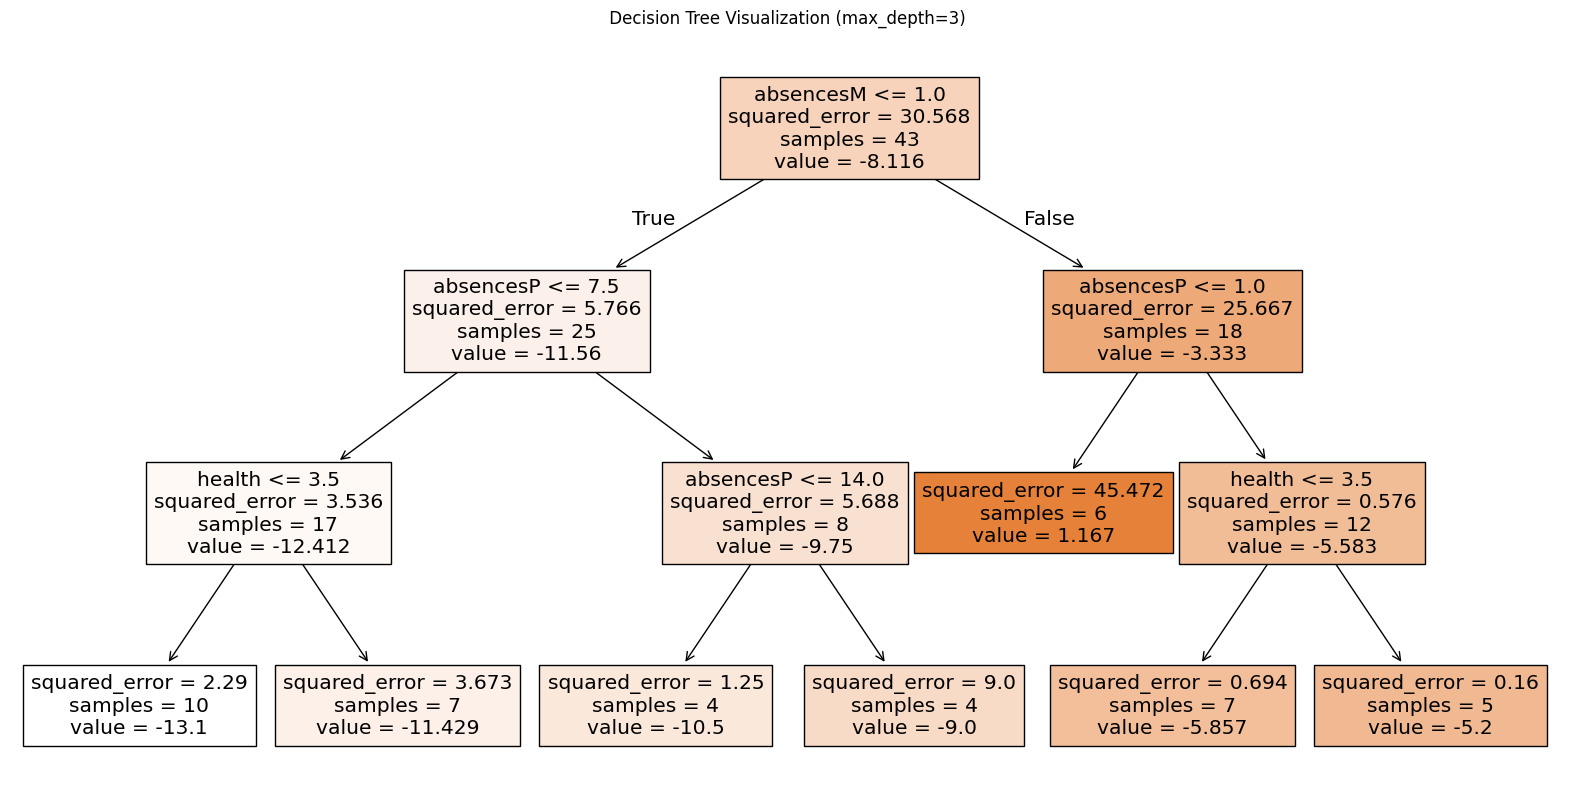

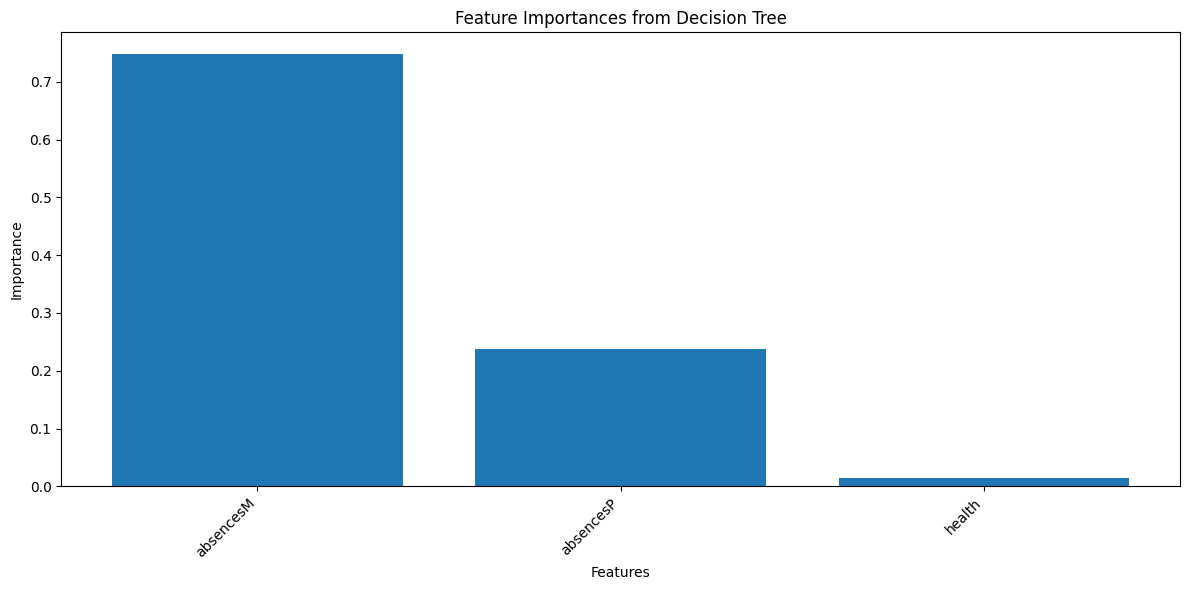

In [28]:
# --- Splitting Data ---
from sklearn.model_selection import train_test_split
X = extreme_gap[features]
y = extreme_gap['DeltaG3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# --- Baseline Decision Tree Model ---
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Baseline Decision Tree MSE: {mse:.2f}")

# --- Hyperparameter Tuning for Decision Tree ---
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
print(f"Optimized Decision Tree MSE: {mse_best_dt:.2f}")

# max_depth number of trees
# the split 2 means that any node in the deciiosn tree will be considred for splitting as long as it has 2 samples , if a split does not have 2 samples, can't split more
#Leaf means every terminal node (leaf) must have at least 4 samples
# --- Random Forest Model ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare predictors without adding a constant (Random Forest does not require it)
X_rf = extreme_gap[['absencesM' , 'absencesP', 'health']]
y_rf = extreme_gap['DeltaG3']

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# Predict on the training data (or a separate test set if available)
y_pred_rf = rf_model.predict(X_rf)

# Calculate Mean Squared Error for model evaluation
mse_rf = mean_squared_error(y_rf, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")

# Print feature importances
importances = rf_model.feature_importances_
for feature, importance in zip(X_rf.columns, importances):
    print(f"{feature}: {importance:.3f}")

# --- Visualization: Decision Tree (limited to depth=3) ---
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=features, filled=True, max_depth=3)
plt.title(" Decision Tree Visualization (max_depth=3)")
plt.show()

#The importance of a feature is computed as the (normalized) total reduction of the criterion(error) brought by that feature. It is also known as the Gini importance.

# --- Visualization: Feature Importances for Decision Tree ---
importances = best_dt.feature_importances_
# Get feature names used in the trained model
feature_names = X_train.columns  # Assuming X_train is your training data

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(feature_names, importances)  # Use feature_names instead of features
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Our decision tree is built using a comprehensive set of predictors including attendance (absencesM, absencesP), personal well-being (health), study habits (studytime and activities), as well as various forms of support (schoolsup, famsup, paidM, paidP) and social behavior (goout, freetime). The tree starts by evaluating all these features and chooses the one that most reduces the mean squared error (MSE) as the first split. In our example, the tree may still prioritize attendance measures (like absencesM or absencesP) in the upper nodes if they most effectively partition the data according to the grade gap (ΔG3). However, additional factors like study time and extracurricular activities might be used in subsequent splits to further refine predictions, especially when the data is more homogenous with respect to attendance. Features representing support (schoolsup, famsup, paidM, paidP) and social habits (goout, freetime) add nuance by capturing environmental and behavioral influences on academic outcomes. This layered approach helps the tree capture both the dominant effects (e.g., attendance) and the subtler, yet significant, contributions of personal and social factors.


The feature importances derived from the decision tree indicate which variables are most influential in predicting the grade gap. A feature is considered important if it is frequently used for splitting the data and if its splits result in a significant reduction in MSE. In our updated model, while attendance features (absencesM and absencesP) often remain highly important, other variables such as health, studytime, and activities can also emerge as key predictors if they effectively differentiate students with varying academic outcomes. Support factors (schoolsup, famsup, paidM, paidP) and social behaviors (goout, freetime) might have lower overall importance but still provide valuable refinements at deeper levels of the tree. The balance among these features in the bar chart informs us about their relative contribution to the model’s predictive power, highlighting the multifaceted nature of academic performance. This comprehensive view allows us to better understand not only which factors drive the grade gap but also how different aspects of a student’s life interact to shape their outcomes.

The Random Forest MSE (e.g., ~2.54) is often lower than the baseline Decision Tree MSE, indicating better predictive accuracy. Ensemble methods typically reduce overfitting by averaging across many trees. The forest may yield a slightly different ordering or magnitude of importance values. Often, absencesM still dominates, but other variables (e.g., health or absencesP) can gain or lose prominence relative to the single decision tree.Random Forest can capture more complex relationships and interactions among features. This explains why its performance can exceed that of a single baseline tree.
The Random Forest results highlight how ensemble techniques refine predictions, reduce variance, and may provide a more robust measure of each feature’s influence compared to a single, shallow decision tree.

In [29]:
import statsmodels.api as sm

# Select predictors: Math absences and health status
X = extreme_gap[['absencesM', 'health', 'absencesP']]
y = extreme_gap['DeltaG3']

# Add a constant term to the predictors for the intercept
X_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_const).fit()

# Print the summary of the model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                DeltaG3   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     14.56
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           6.10e-07
Time:                        22:26:32   Log-Likelihood:                -154.38
No. Observations:                  54   AIC:                             316.8
Df Residuals:                      50   BIC:                             324.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1471      1.829     -7.733      0.0

In [19]:
import statsmodels.api as sm

# Regression 1: MG3 ~ absencesP
X_mg3_ap = sm.add_constant(sm_inter[['absencesP']])
model_mg3_ap = sm.OLS(sm_inter['MG3'], X_mg3_ap).fit()
print("Regression Results for MG3 ~ absencesP:")
print(model_mg3_ap.summary())

# Regression 2: MG3 ~ absencesM
X_mg3_am = sm.add_constant(sm_inter[['absencesM']])
model_mg3_am = sm.OLS(sm_inter['MG3'], X_mg3_am).fit()
print("\nRegression Results for MG3 ~ absencesM:")
print(model_mg3_am.summary())

# Regression 3: PG3 ~ absencesP
X_pg3_ap = sm.add_constant(sm_inter[['absencesP']])
model_pg3_ap = sm.OLS(sm_inter['PG3'], X_pg3_ap).fit()
print("\nRegression Results for PG3 ~ absencesP:")
print(model_pg3_ap.summary())

# Regression 4: PG3 ~ absencesM
X_pg3_am = sm.add_constant(sm_inter[['absencesM']])
model_pg3_am = sm.OLS(sm_inter['PG3'], X_pg3_am).fit()
print("\nRegression Results for PG3 ~ absencesM:")
print(model_pg3_am.summary())

# Regression 4: PG3 ~ health
X_pg3_am = sm.add_constant(sm_inter[['health']])
model_pg3_am = sm.OLS(sm_inter['PG3'], X_pg3_am).fit()
print("\nRegression Results for PG3 ~ health:")
print(model_pg3_am.summary())

# Regression 4: MG3 ~ health
X_pg3_am = sm.add_constant(sm_inter[['health']])
model_pg3_am = sm.OLS(sm_inter['MG3'], X_pg3_am).fit()
print("\nRegression Results for MG3 ~ health:")
print(model_pg3_am.summary())



Regression Results for MG3 ~ absencesP:
                            OLS Regression Results                            
Dep. Variable:                    MG3   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     11.31
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           0.000851
Time:                        22:12:00   Log-Likelihood:                -1084.3
No. Observations:                 370   AIC:                             2173.
Df Residuals:                     368   BIC:                             2180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

Descriptive Statistics:
        absencesM   absencesP      health
count  370.000000  370.000000  370.000000
mean     5.381081    3.632432    3.562162
std      7.665653    4.827656    1.407558
min      0.000000    0.000000    1.000000
25%      0.000000    0.000000    3.000000
50%      4.000000    2.000000    4.000000
75%      8.000000    6.000000    5.000000
max     75.000000   32.000000    5.000000

Correlation Matrix:
           absencesM  absencesP    health
absencesM   1.000000   0.528048 -0.008104
absencesP   0.528048   1.000000  0.008556
health     -0.008104   0.008556  1.000000


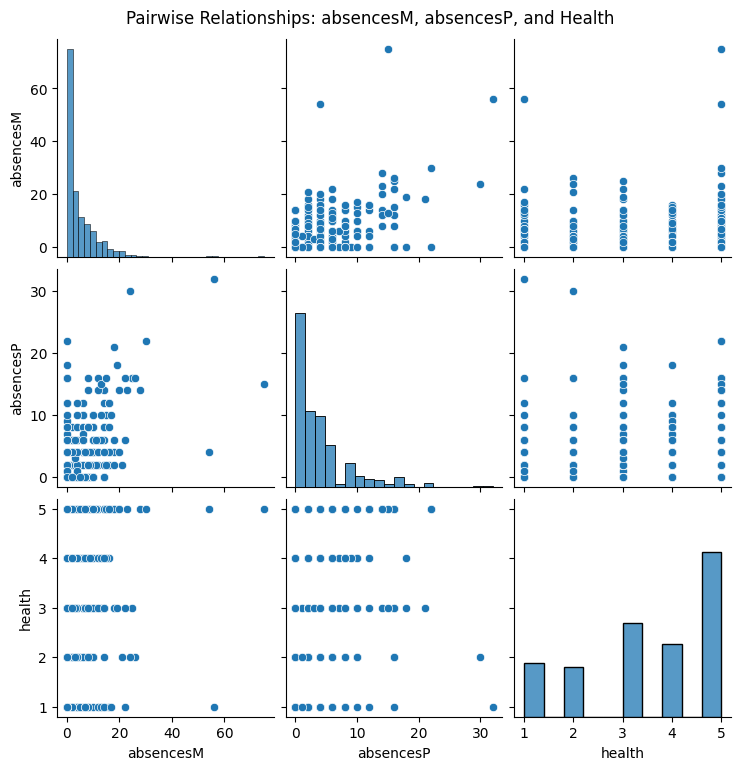

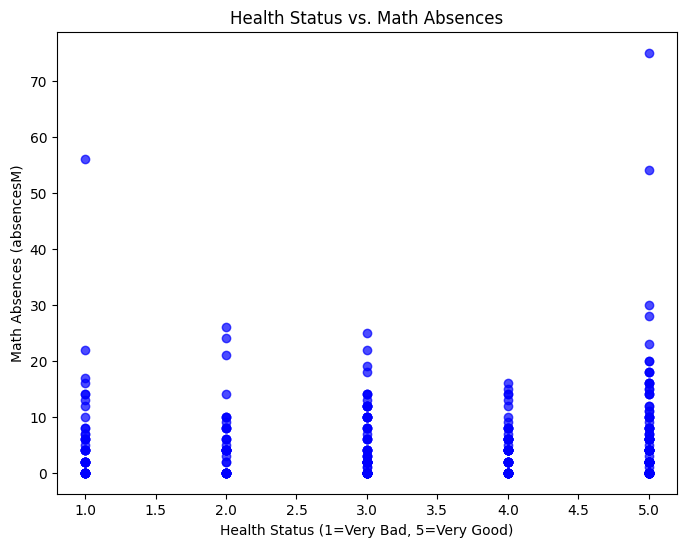

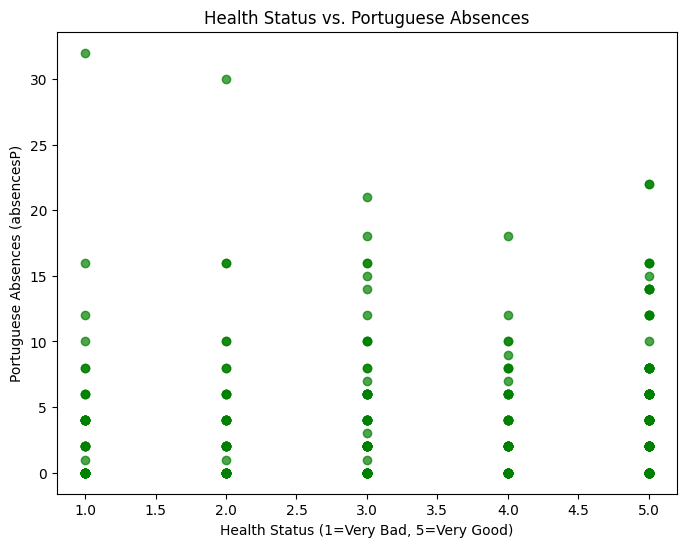

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subset with relevant variables
data_subset = sm_inter[['absencesM', 'absencesP', 'health']]

# 1. Descriptive Statistics and Correlation Analysis
print("Descriptive Statistics:")
print(data_subset.describe())
print("\nCorrelation Matrix:")
print(data_subset.corr())

# 2. Pairplot to Visualize Relationships
sns.pairplot(data_subset)
plt.suptitle("Pairwise Relationships: absencesM, absencesP, and Health", y=1.02)
plt.show()

# 3. Scatter Plot Example: Health vs. Math Absences
plt.figure(figsize=(8,6))
plt.scatter(sm_inter['health'], sm_inter['absencesM'], color='blue', alpha=0.7)
plt.xlabel('Health Status (1=Very Bad, 5=Very Good)')
plt.ylabel('Math Absences (absencesM)')
plt.title('Health Status vs. Math Absences')
plt.show()

# 4. Scatter Plot Example: Health vs. Portuguese Absences
plt.figure(figsize=(8,6))
plt.scatter(sm_inter['health'], sm_inter['absencesP'], color='green', alpha=0.7)
plt.xlabel('Health Status (1=Very Bad, 5=Very Good)')
plt.ylabel('Portuguese Absences (absencesP)')
plt.title('Health Status vs. Portuguese Absences')
plt.show()
